# Project 2 - Ames Housing Data
## EDA and Cleaning - Test.csv

![House](images/phil-hearing-house-small.jpg)
<br>Photo by:
https://unsplash.com/photos/IYfp2Ixe9nM?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
houses = pd.read_csv('../datasets/test.csv')

In [82]:
houses.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [83]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

Any column that does not have 878 non-null values in houses.info() will need further investigation.

In [84]:
houses.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count   878.000000  8.780000e+02   878.000000    718.000000     878.000000   
mean   1444.749431  7.162867e+08    58.268793     69.545961   10307.033030   
std     850.838263  1.889103e+08    42.235407     23.533945   10002.674602   
min       2.000000  5.263021e+08    20.000000     21.000000    1477.000000   
25%     692.250000  5.284841e+08    20.000000     59.000000    7297.250000   
50%    1433.000000  5.354542e+08    50.000000     68.000000    9446.000000   
75%    2197.500000  9.071904e+08    70.000000     80.000000   11589.000000   
max    2928.000000  1.007100e+09   190.000000    182.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count    878.000000    878.000000   878.000000      878.000000    877.000000   
mean       6.050114      5.566059  1970.492027     1984.417995    106.236032   
std        1.369065      1.128903    30.395895       20.450725    187.158908   
min        2.000000      1.000000  1880.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1967.000000      0.000000   
50%        6.000000      5.000000  1972.000000     1992.000000      0.000000   
75%        7.000000      6.000000  1999.750000     2003.000000    172.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1378.000000   

       ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
count  ...   878.000000    878.000000     878.000000      878.000000   
mean   ...   470.362187     93.430524      47.070615       24.064920   
std    ...   212.734075    121.181702      68.180939       73.249463   
min    ...     0.000000      0.000000       0.000000        0.000000   
25%    ...   322.500000      0.000000       0.000000        0.000000   
50%    ...   473.000000      0.000000      27.000000        0.000000   
75%    ...   576.000000    170.750000      69.750000        0.000000   
max    ...  1488.000000    690.000000     742.000000     1012.000000   

       3Ssn Porch  Screen Porch   Pool Area      Misc Val     Mo Sold  \
count  878.000000    878.000000  878.000000    878.000000  878.000000   
mean     2.597950     14.830296    1.884966     48.498861    6.202733   
std     24.962482     53.003794   29.916672    550.169317    2.642498   
min      0.000000      0.000000    0.000000      0.000000    1.000000   
25%      0.000000      0.000000    0.000000      0.000000    5.000000   
50%      0.000000      0.000000    0.000000      0.000000    6.000000   
75%      0.000000      0.000000    0.000000      0.000000    8.000000   
max    360.000000    576.000000  555.000000  15500.000000   12.000000   

           Yr Sold  
count   878.000000  
mean   2007.825740  
std       1.327861  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 38 columns]

Analyse **Lot Frontage** column - continuous. Linear feet of street connected to property

In [85]:
houses['Lot Frontage'].isnull().sum()

160

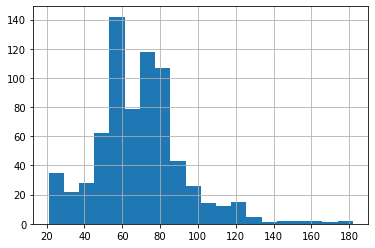

In [86]:
houses['Lot Frontage'].hist(bins = 20)

In [87]:
houses[houses['Lot Frontage']>150].shape

(6, 80)

In [88]:
houses[houses['Lot Frontage']<150].shape

(711, 80)

Investigating whether to fill in null values in the Lot Frontage column with the mean of the column:

Lot Frontage does appear to have a few outliers that skew the mean higher (6 rows out of the total 711), but discarding them has minimal affect on the mean - it goes up from 68.6 to 69.5.

So might as well just use the mean of the entire column.

In [89]:
smaller_lot_frontage = houses[houses['Lot Frontage']<150]
smaller_lot_frontage['Lot Frontage'].mean()

68.61884669479606

In [90]:
LotFrontage_mean = houses['Lot Frontage'].mean()
print (LotFrontage_mean)

69.54596100278552


In [91]:
houses['Lot Frontage'].fillna(houses['Lot Frontage'].mean(), inplace=True)
houses['Lot Frontage'].isnull().sum()

0

Analyse **Alley** column - categorical. Type of alley access to property

In [92]:
houses['Alley'].value_counts()

Grvl    35
Pave    23
Name: Alley, dtype: int64

In [93]:
houses['Alley'].isnull().sum()

820

The Alley column has 1911 empty values.  Replace all with "None".

In [94]:
houses['Alley'].fillna('None', inplace=True)

In [95]:
houses['Alley'].value_counts()

None    820
Grvl     35
Pave     23
Name: Alley, dtype: int64

In [96]:
houses['Alley'].isnull().sum()

0

Analyse **Mas Vnr Type** column - categorical. Masonry veneer type

In [97]:
houses['Mas Vnr Type'].value_counts()

None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [98]:
houses['Mas Vnr Type'].isnull().sum()

1

Assume the value of None also applies to the 22 rows containing null values for Mas Vnr Type.

In [99]:
houses['Mas Vnr Type'].fillna('None', inplace=True)

In [100]:
houses['Mas Vnr Type'].value_counts()

None       535
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

Analyse **Mas Vnr Area** column - continuous values. Masonry veneer area in square feet

In [101]:
houses['Mas Vnr Area'].value_counts()

0.0      532
216.0      7
80.0       5
420.0      5
196.0      5
        ... 
464.0      1
312.0      1
101.0      1
238.0      1
208.0      1
Name: Mas Vnr Area, Length: 232, dtype: int64

In [102]:
houses['Mas Vnr Area'].isnull().sum()

1

Assume the 22 rows containing null values for Mas Vnr Area can be safely replaced with 0.

In [103]:
houses['Mas Vnr Area'].fillna(0.0, inplace=True)
houses['Mas Vnr Area'].value_counts()

0.0      533
216.0      7
80.0       5
420.0      5
196.0      5
        ... 
464.0      1
312.0      1
101.0      1
238.0      1
208.0      1
Name: Mas Vnr Area, Length: 232, dtype: int64

Analyse **Bsmt Qual** column - categorical. Evaluates the height of the basement

In [104]:
houses['Bsmt Qual'].value_counts()

TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64

In [105]:
houses['Bsmt Qual'].isnull().sum()

25

The data dictionary specifies acceptable values:<br>
Ex	Excellent (100+ inches)<br>
Gd	Good (90-99 inches)<br>
TA	Typical (80-89 inches)<br>
Fa	Fair (70-79 inches)<br>
Po	Poor (<70 inches<br>
NA	No Basement

Replace null values with NA

In [106]:
houses['Bsmt Qual'].fillna('NA', inplace=True)
houses['Bsmt Qual'].value_counts()

TA    396
Gd    355
Ex     73
Fa     28
NA     25
Po      1
Name: Bsmt Qual, dtype: int64

Analyse **Bsmt Cond** column - categorical. Evaluates the general condition of the basement.

As with Bsmt Qual, can replace nulls with NA

In [107]:
houses['Bsmt Cond'].value_counts()

TA    781
Fa     39
Gd     33
Name: Bsmt Cond, dtype: int64

In [108]:
houses['Bsmt Cond'].isnull().sum()

25

In [109]:
houses['Bsmt Cond'].fillna('NA', inplace=True)
houses['Bsmt Cond'].value_counts()

TA    781
Fa     39
Gd     33
NA     25
Name: Bsmt Cond, dtype: int64

Analyse **Bsmt Exposure** - categorical. Refers to walkout or garden level walls.

58 rows with null value. If null, replace with NA

In [110]:
houses['Bsmt Exposure'].fillna('NA', inplace=True)
houses['Bsmt Exposure'].value_counts()

No    567
Av    130
Gd     80
Mn     76
NA     25
Name: Bsmt Exposure, dtype: int64

Analyse **BsmtFin Type 1** column - categorical. Rating of basement finished area.

As above, NA is an acceptable value for No Basement

In [111]:
houses['BsmtFin Type 1'].value_counts()

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: BsmtFin Type 1, dtype: int64

In [112]:
houses['BsmtFin Type 1'].isnull().sum()

25

In [113]:
houses['BsmtFin Type 1'].fillna('NA', inplace=True)
houses['BsmtFin Type 1'].value_counts()

Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
NA      25
Name: BsmtFin Type 1, dtype: int64

Analyse **BsmtFin SF 1** column - continuous. Type 1 finished square feet.

Only 1 row with null value.  Set to 0

In [114]:
houses['BsmtFin SF 1'].value_counts()

0      273
24      10
602      4
936      4
600      4
      ... 
601      1
604      1
605      1
609      1
472      1
Name: BsmtFin SF 1, Length: 462, dtype: int64

In [115]:
houses['BsmtFin SF 1'].isnull().sum()

0

In [116]:
houses['BsmtFin SF 1'].fillna(0.0, inplace=True)

Analyse **BsmtFin Type 2** column - Rating of basement finished area (if multiple types).

56 rows with null value. Set to NA if null.

In [117]:
houses['BsmtFin Type 2'].value_counts()

Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64

In [118]:
houses['BsmtFin Type 2'].fillna('NA', inplace=True)

Analyse **BsmtFin SF 2** column - continuous. Type 2 finished square feet.

Only one row, set to 0.

In [119]:
houses['BsmtFin SF 2'].isnull().sum()

0

In [120]:
houses['BsmtFin SF 2'].fillna(0.0, inplace=True)

Analyse **Bsmt Unf SF** column - continuous. Unfinished square feet of basement area.

Only one row, set to 0.

In [121]:
houses['Bsmt Unf SF'].isnull().sum()

0

In [122]:
houses['Bsmt Unf SF'].fillna(0.0, inplace=True)

Analyse **Total Bsmt SF** column - continuous. Total square feet of basement area.

Only one row, set to 0.

In [123]:
houses['Total Bsmt SF'].isnull().sum()

0

In [124]:
houses['Total Bsmt SF'].fillna(0.0, inplace=True)

Analyse **Bsmt Full Bath** column - discrete. Basement full bathrooms.

Two rows. If null set to 0.

In [125]:
houses['Bsmt Full Bath'].value_counts()

0    507
1    356
2     15
Name: Bsmt Full Bath, dtype: int64

In [126]:
houses['Bsmt Full Bath'].isnull().sum()

0

In [127]:
houses['Bsmt Full Bath'].fillna(0.0, inplace=True)

Analyse **Bsmt Half Bath** column - discrete. Basement half bathrooms.

Two rows.  If null, set to 0.0

In [128]:
houses['Bsmt Half Bath'].value_counts()

0    829
1     49
Name: Bsmt Half Bath, dtype: int64

In [129]:
houses['Bsmt Half Bath'].isnull().sum()

0

In [130]:
houses['Bsmt Half Bath'].fillna(0.0, inplace=True)

Analyse **Fireplace Qu** column - categorical. Fireplace quality.

1000 null values. If null set to NA.

In [131]:
houses['Fireplace Qu'].value_counts()

Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: Fireplace Qu, dtype: int64

In [132]:
houses['Fireplace Qu'].fillna('NA', inplace=True)

Analyse **Garage Type** - categorical. Garage location.

113 null values. If null to NA.

In [133]:
houses['Garage Type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     53
Basment      9
2Types       4
CarPort      4
Name: Garage Type, dtype: int64

In [134]:
houses['Garage Type'].fillna('NA', inplace=True)

Analyse **Garage Yr Blt** - discrete.  Year garage was built.

114 null values.  Replace null with value of Year Built column to avoid skewing the data with 0's

In [135]:
houses['Garage Yr Blt'].value_counts()

2005.0    37
2006.0    35
2007.0    30
2004.0    27
2003.0    26
          ..
1916.0     1
1927.0     1
1931.0     1
1928.0     1
1921.0     1
Name: Garage Yr Blt, Length: 93, dtype: int64

In [136]:
houses['Garage Yr Blt'].fillna(houses['Year Built'], inplace=True)

In [137]:
houses['Garage Yr Blt'].isnull().sum()

0

Analyse **Garage Finish** column - categorical.  Interior finish of the garage.

114 rows with null values. If null, set to NA

In [138]:
houses['Garage Finish'].value_counts()

Unf    382
RFn    233
Fin    218
Name: Garage Finish, dtype: int64

In [139]:
houses['Garage Finish'].fillna('NA', inplace=True)

Analyse **Garage Cars** column - numerical categories.  Size of garage in car capacity.

1 row with null value. If null, set to 0.0

In [140]:
houses['Garage Cars'].value_counts()

2    467
1    254
3    110
0     44
4      3
Name: Garage Cars, dtype: int64

In [141]:
houses['Garage Cars'].fillna(0.0, inplace=True)

Analyse **Garage Area** column - continuous.  Size of garage in square feet.

1 row with null value. If null, set to 0.0

In [142]:
houses['Garage Area'].fillna(0.0, inplace=True)

Analyse **Garage Qual** column - categorial.   Garage quality

114 rows with null value. If null, set to NA

In [143]:
houses['Garage Qual'].fillna('NA', inplace=True)

In [144]:
houses['Garage Qual'].value_counts()

TA    782
NA     45
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

Analyse **Garage Cond** column - categorical. Garage condition

114 rows with null value. If null, replace with NA.

In [145]:
houses['Garage Cond'].fillna('NA', inplace=True)

Analyse **Pool QC** column - categorical.  Pool Quality.

2042 rows will null value. If null, set to NA.

In [146]:
houses['Pool QC'].fillna('NA', inplace=True)

In [147]:
houses['Pool QC'].value_counts()

NA    874
Ex      3
TA      1
Name: Pool QC, dtype: int64

Analyse **Fence** column - categorical.  Fence quality.

1651 rows with null value. If null, set to NA

In [148]:
houses['Fence'].fillna('NA', inplace=True)

In [149]:
houses['Fence'].value_counts()

NA       706
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

Analyse **Misc Feature** - categorical. Miscellaneous feature not covered in other categories

1986 rows with null values. If null, replace with NA.

In [150]:
houses['Misc Feature'].fillna('NA', inplace=True)

In [151]:
houses['Misc Feature'].value_counts()

NA      837
Shed     39
Gar2      1
Othr      1
Name: Misc Feature, dtype: int64

---
## Other clean-up

In [152]:
houses['MS Zoning'].value_counts()

RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: MS Zoning, dtype: int64

According to the data dictionary, MS Zoning labels should be:
A, C, FV, I. RH, RL, RP and RM.

Remove extra text from C, A, and I labels.

In [153]:
#Just return first letter from a label if it contains 'all' or 'agr'
houses['MS Zoning'] = [label[0] if 'all' in label else label for label in houses['MS Zoning']]
houses['MS Zoning'] = [label[0] if 'agr' in label else label for label in houses['MS Zoning']]

#### Save cleaned data to csv.

In [154]:
houses.to_csv('../datasets/test_clean.csv', index=False)

In [156]:
houses.shape

(878, 80)